# ECEN 689 HW 5

## Question 1

Let X = [0,1]. Let $h_{TRUE}(x)$ := cos2πx. Generate a Training Set of m samples as follows. First generate {$x_i$ : 1 ≤ i ≤ t}, where each $x_i$ is independently and uniformly distributed on [0,1]. For each $x_i$, the noisy label is $y_i := h_{TRUE}(x_i) + w_i$, where the wi are independently and N(0,0.01) distributed, i.e., normally distributed with mean 0 and variance 0.01. Independently also generate a separate Test set of t labeled samples in the same way.

In [1]:
# import required libraries
import random
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
# define the functions for generating variable with different distributions
def gen_uniform_dist(start=0, end=1):
    """
    Generate an independent variable with uniform distribution.
    """
    return random.uniform(start, end)

def gen_normal_dist(mean=0, var=1):
    """
    Generate an independent variable with normal distribution.
    """
    return random.gauss(mean, var)

def gen_h_true(x):
    """
    Generate y_i by the given x_i with the true hypothesis.
    """
    return math.cos(2*math.pi*x)

def gen_noisy_label(x):
    """
    Generate noisy label y_i by the given x_i.
    """
    return gen_h_true(x) + gen_normal_dist(0, 0.01)

### (i) 

For a Training Set of m = 10 samples, determine the least squares fit by polynomials $p_n(x) = w_0 + w_1x + w_2x^2 + ... + w_nx^n$ of degrees less than or equal to n = 0,1,2,...,10. For each n, determine the polynomial $p_n(x)$ that minimizes the Training Error, defined as the sum of the squares of the fitting errors at the 10 training data points. Plot the Training Error for the best fit polynomials of degree n = 0,1,2,...,10.

In [3]:
# generate x_i
x_train_list = []
for i in range(10):
    x_train_list.append(gen_uniform_dist())
x_train_10 = np.array(x_train_list).reshape(-1, 1)
x_train_10

array([[0.90423703],
       [0.88211218],
       [0.9943679 ],
       [0.43114049],
       [0.39289392],
       [0.10563227],
       [0.06054122],
       [0.54153903],
       [0.33708477],
       [0.48375264]])

In [4]:
# generate noisy label y_i
y_train_list = []
for i in range(10):
    y_train_list.append(gen_noisy_label(x_train_10[i]))
y_train_10 = np.array(y_train_list).reshape(-1, 1)
y_train_10

array([[ 0.82685649],
       [ 0.73263985],
       [ 0.99983148],
       [-0.90818021],
       [-0.78176101],
       [ 0.78365239],
       [ 0.92740144],
       [-0.96047417],
       [-0.51137951],
       [-1.00121086]])

The polynomial coefficients for degree 0 are: [[0.]]


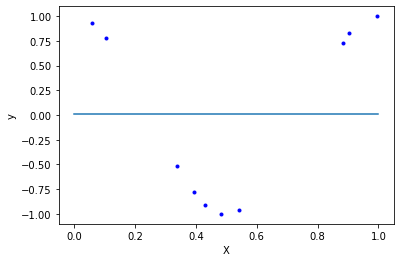

The polynomial coefficients for degree 1 are: [[0.         0.63081872]]


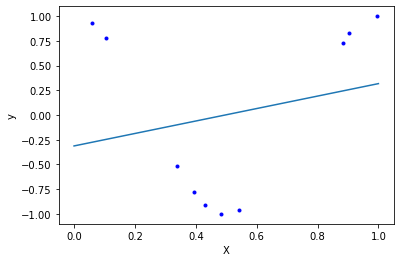

The polynomial coefficients for degree 2 are: [[ 0.         -9.60716536  9.45744674]]


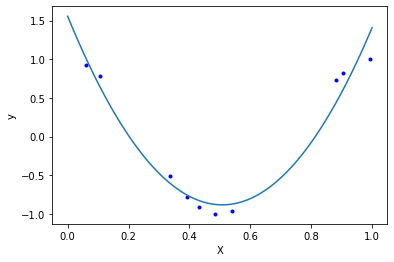

The polynomial coefficients for degree 3 are: [[  0.         -13.32361098  19.23313447  -6.52395937]]


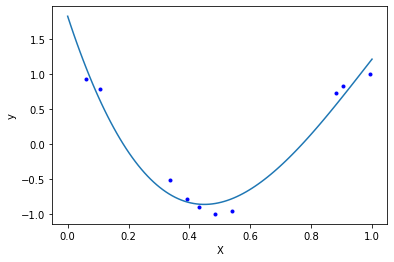

The polynomial coefficients for degree 4 are: [[  0.           2.82962306 -43.46307929  80.30231536 -39.56755531]]


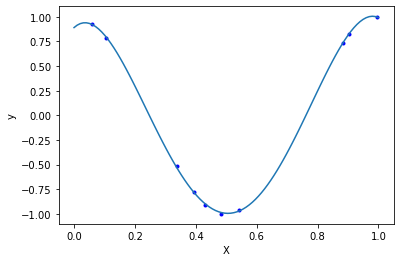

The polynomial coefficients for degree 5 are: [[  0.           2.41253677 -41.06637623  74.66436981 -33.81833927
   -2.1119686 ]]


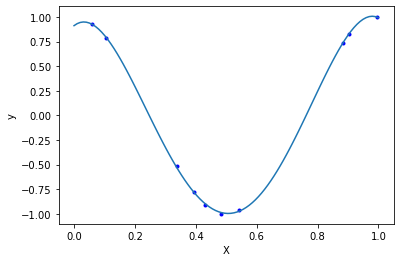

The polynomial coefficients for degree 6 are: [[   0.           -1.28922762   -5.6937511   -68.04981752  238.85816529
  -245.3109623    81.45275135]]


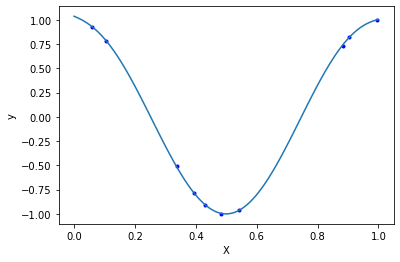

The polynomial coefficients for degree 7 are: [[   0.           -4.50097678   31.36875586 -258.43493547  740.33891447
  -950.57483193  584.05562918 -142.3901896 ]]


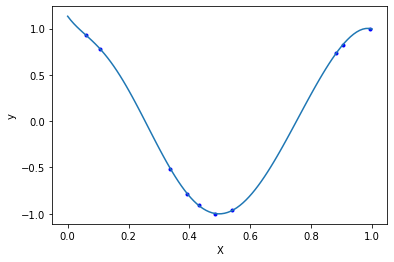

The polynomial coefficients for degree 8 are: [[    0.             5.7985541   -101.24765425   542.37156287
  -1876.21589555  3954.17265756 -4682.68346583  2866.32481263
   -708.3817091 ]]


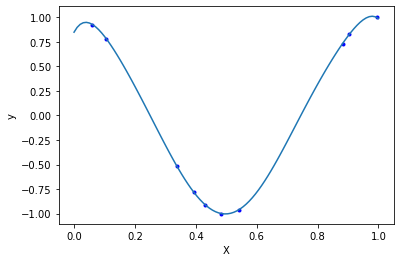

The polynomial coefficients for degree 9 are: [[ 0.00000000e+00 -1.12077625e+02  1.58137061e+03 -1.13538539e+04
   4.60007833e+04 -1.13007877e+05  1.71856476e+05 -1.57775077e+05
   7.99518762e+04 -1.71446220e+04]]


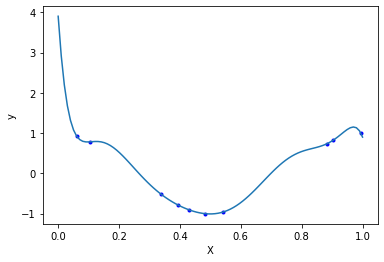

The polynomial coefficients for degree 10 are: [[-8.57852538e-05 -7.69481886e+01  1.03069336e+03 -6.89841626e+03
   2.46815596e+04 -4.84989786e+04  4.49914764e+04  3.90493769e+03
  -4.86970608e+04  4.08602885e+04 -1.12997281e+04]]


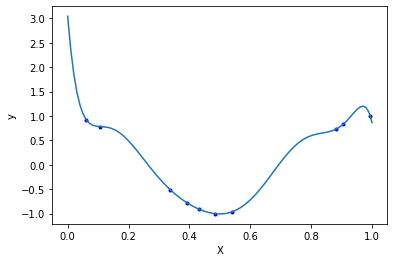

In [5]:
# iterate degree from 0 to 10
poly_estimator = []
mse_train = []
for i in range(11):
    # generate polynomial features
    poly = PolynomialFeatures(degree=i)
    x_pf_train = poly.fit_transform(x_train_10)

    # fit and show the trained coefficients
    lr = LinearRegression()
    lr.fit(x_pf_train, y_train_10)
    poly_estimator.append(lr)
    y_train_predict = lr.predict(x_pf_train)
    print("The polynomial coefficients for degree %d are: %s" % (i, lr.coef_))
    
    # get the mean squared error for training set
    mse_train.append(mean_squared_error(y_train_10, y_train_predict))
    
    # plot the curve
    plt.plot(x_train_10, y_train_10, "b.")
    plt.xlabel('X')
    plt.ylabel('y')
    xx = np.linspace(0, 1, 100)
    xx_transformed = poly.fit_transform(xx.reshape(xx.shape[0], 1), "r")
    yy = lr.predict(xx_transformed)
    plt.plot(xx, yy)
    plt.show()

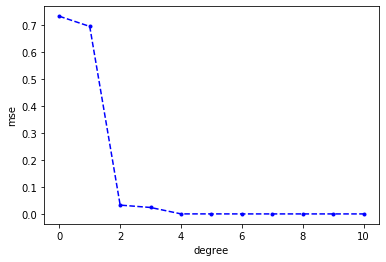

In [6]:
# plot the training error figure
plt.plot(range(0, 11), mse_train, "--b.")
plt.xlabel('degree')
plt.ylabel('mse')
plt.show()

### (ii) 

Plot the Test Error of each of the polynomials obtained in (i) for a Test Set of t =100 samples.

In [7]:
# generate x_i
x_test_list = []
for i in range(100):
    x_test_list.append(gen_uniform_dist())
x_test = np.array(x_test_list).reshape(-1, 1)

In [8]:
# generate noisy label y_i
y_test_list = []
for i in range(100):
    y_test_list.append(gen_noisy_label(x_test[i]))
y_test = np.array(y_test_list).reshape(-1, 1)

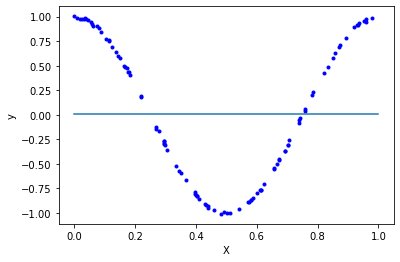

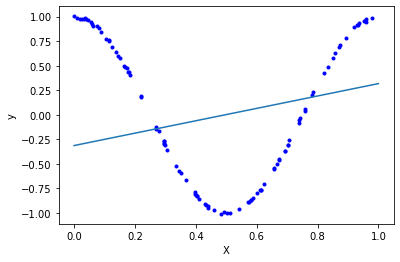

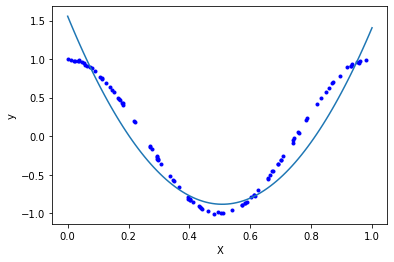

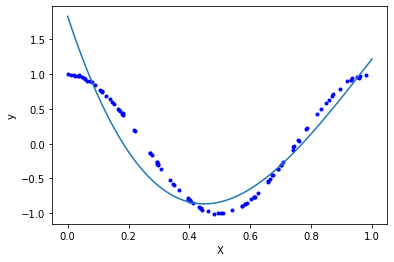

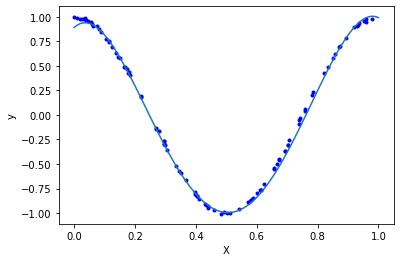

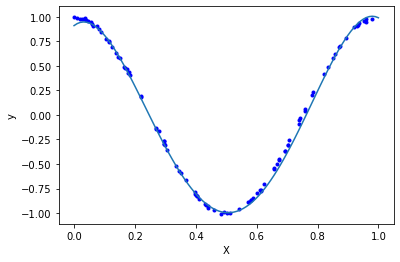

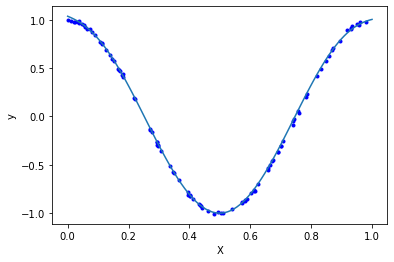

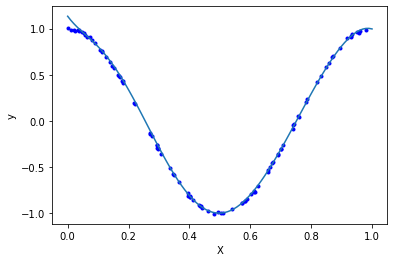

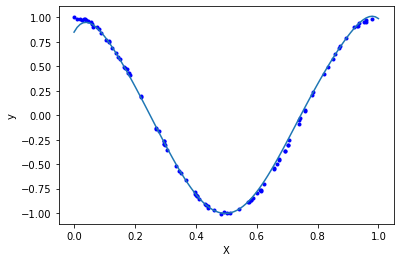

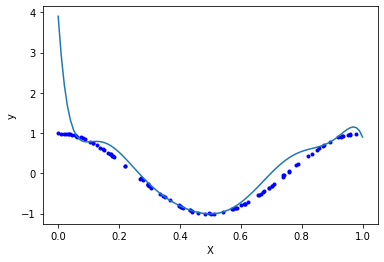

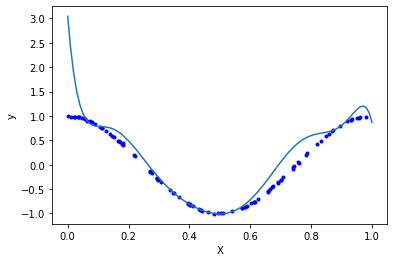

In [9]:
# iterate degree from 0 to 10
mse_test = []
for i in range(11):
    # generate polynomial features
    poly = PolynomialFeatures(degree=i)
    x_pf_test = poly.fit_transform(x_test)

    # get polynomial estimator and predict
    lr = poly_estimator[i]
    y_test_predict = lr.predict(x_pf_test)

    # get the mean squared error for test set
    mse_test.append(mean_squared_error(y_test, y_test_predict))
    
    # plot the curve
    plt.plot(x_test, y_test, "b.")
    plt.xlabel('X')
    plt.ylabel('y')
    xx = np.linspace(0, 1, 100)
    xx_transformed = poly.fit_transform(xx.reshape(xx.shape[0], 1), "r")
    yy = lr.predict(xx_transformed)
    plt.plot(xx, yy)
    plt.show()

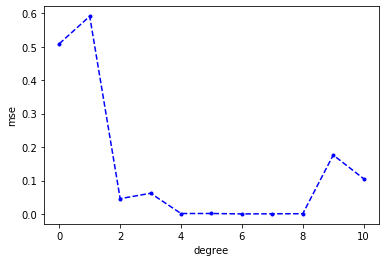

In [10]:
# plot the test error figure
plt.plot(range(0, 11), mse_test, "--b.")
plt.xlabel('degree')
plt.ylabel('mse')
plt.show()

In [11]:
mse_test

[0.5089029094745537,
 0.5910179825998793,
 0.04582765275434943,
 0.0619573917161073,
 0.0014277368570963104,
 0.001506117657070334,
 0.00023255281312984478,
 0.0006103674910376891,
 0.0008134770740353244,
 0.1761556949271402,
 0.10552350548042357]

### (iii) 

What value of n has the minimal Test Error?

**Answer:**

According to the test mse array, we can see that when n = 6, it has the minimal test mse = 0.00023255281312984478.

### (iv) 

Repeat (i,ii,iii) when m = 20.

In [12]:
# generate x_i for training set
x_train_list = []
for i in range(20):
    x_train_list.append(gen_uniform_dist())
x_train_20 = np.array(x_train_list).reshape(-1, 1)

# generate noisy label y_i for training set
y_train_list = []
for i in range(20):
    y_train_list.append(gen_noisy_label(x_train_20[i]))
y_train_20 = np.array(y_train_list).reshape(-1, 1)

In [13]:
# iterate degree from 0 to 10
mse_train = []
mse_test = []
for i in range(11):
    # generate polynomial features for training set
    poly = PolynomialFeatures(degree=i)
    x_pf_train = poly.fit_transform(x_train_20)

    # fit and show the trained coefficients
    lr = LinearRegression()
    lr.fit(x_pf_train, y_train_20)
    poly_estimator.append(lr)
    y_train_predict = lr.predict(x_pf_train)
    
    # get the mean squared error for training set
    mse_train.append(mean_squared_error(y_train_20, y_train_predict))
    
    # generate polynomial features for test set
    poly = PolynomialFeatures(degree=i)
    x_pf_test = poly.fit_transform(x_test)

    # get polynomial estimator and predict
    y_test_predict = lr.predict(x_pf_test)

    # get the mean squared error for test set
    mse_test.append(mean_squared_error(y_test, y_test_predict))

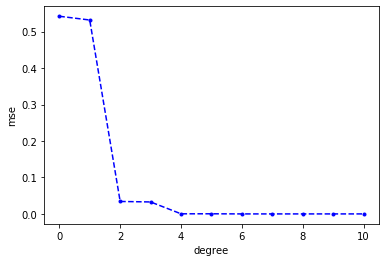

In [14]:
# plot the test error figure
plt.plot(range(0, 11), mse_test, "--b.")
plt.xlabel('degree')
plt.ylabel('mse')
plt.show()

In [15]:
mse_test

[0.5418884317361827,
 0.5315390361854538,
 0.03428592928823347,
 0.03292274187373974,
 0.00041052458507314195,
 0.0004676480492252023,
 0.0001395896013750118,
 0.0001337037185558005,
 0.0001294752247541495,
 0.0001333387405916334,
 0.00014752708969938488]

Therefore, we can see that when n = 8, it has the minimal test mse = 0.0001294752247541495.

## Question 2

In this problem we will study the $l_2$-regularization method for the same datasets. Consider the regularized error with a regularization coefficient $\lambda > 0$:

$$
\frac{1}{m}[\sum_{i=1}^m(y_i − p_n(x_i))^2] + \lambda(w_0^2 +w_1^2 +...+w_n^2)
$$

This is called Ridge Regression.

### Note:

Since Prof. Kumar mentioned in the office hours that we can use any machine learning support, like Tensorflow. So here I'm gonnar use scikit-learn to implement question 2.

And I checked the page of [sklearn.linear_model.Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge), it mentions that:

> Minimizes the objective function:
> ||y - Xw||^2_2 + alpha * ||w||^2_2

So it does exactly implement what we want.

### (i) 

For a range of values of λ > 0 ranging from very small to large, determine the polynomials $p^λ_{10}(x)$ that minimize the regularized error for each λ. Plot the Training Error of each of these polynomials as a function of λ. For the x-axis, you may want to have log λ rather than λ.

Plot classifier with 𝜆 = 1e-12 :


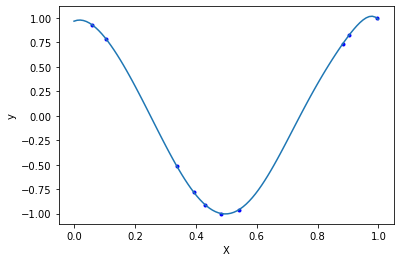

Plot classifier with 𝜆 = 1e-10 :


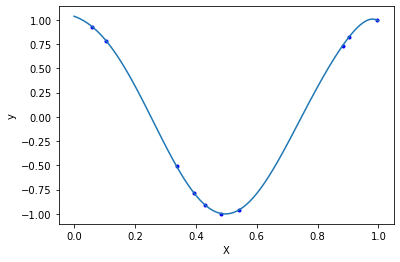

Plot classifier with 𝜆 = 1e-08 :


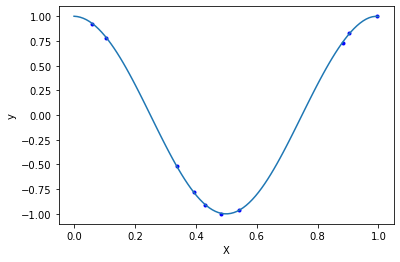

Plot classifier with 𝜆 = 1e-06 :


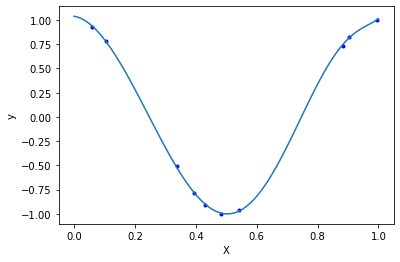

Plot classifier with 𝜆 = 0.0001 :


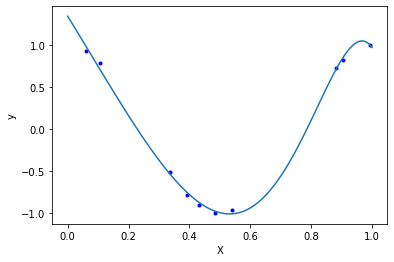

Plot classifier with 𝜆 = 0.01 :


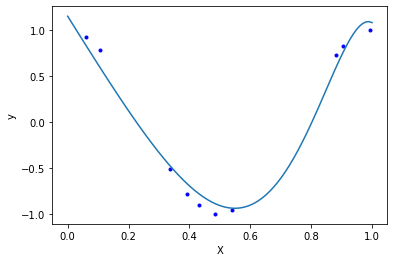

Plot classifier with 𝜆 = 1.0 :


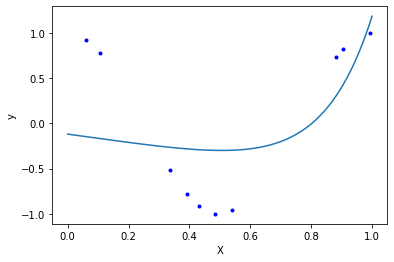

Plot classifier with 𝜆 = 100.0 :


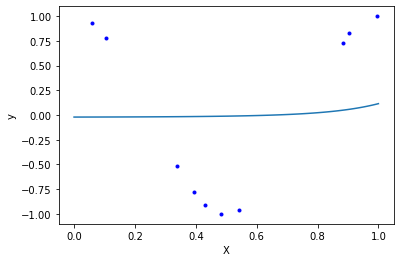

Plot classifier with 𝜆 = 10000.0 :


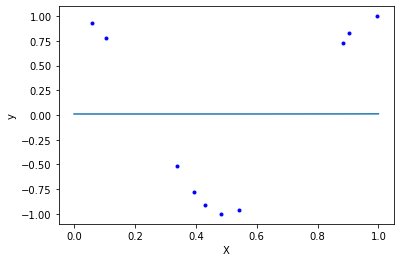

In [16]:
# generate polynomial features
poly = PolynomialFeatures(degree=10)
x_pf_train = poly.fit_transform(x_train_10)

# generate lambda from 1e-12 to 1e6
lambda_list = []
for i in range(-12, 6):
    lambda_list.append(math.pow(10, i))

# iterate lambda
mse_train = []
ridge_estimators = []
for i in range(len(lambda_list)):
    # fit and predict
    clf = Ridge(alpha=lambda_list[i])
    clf.fit(x_pf_train, y_train_10)
    ridge_estimators.append(clf)
    y_train_predict = clf.predict(x_pf_train)
    
    # get the mean squared error for training set
    mse_train.append(mean_squared_error(y_train_10, y_train_predict))
    
    # plot the curve
    if i % 2 == 0:
        print("Plot classifier with 𝜆 = %s :" % (lambda_list[i]))
        plt.plot(x_train_10, y_train_10, "b.")
        plt.xlabel('X')
        plt.ylabel('y')
        xx = np.linspace(0, 1, 100)
        xx_transformed = poly.fit_transform(xx.reshape(xx.shape[0], 1), "r")
        yy = clf.predict(xx_transformed)
        plt.plot(xx, yy)
        plt.show()

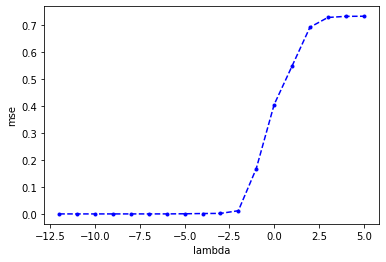

In [17]:
# plot the training error figure
plt.plot([math.log(x, 10) for x in lambda_list], mse_train, "--b.")
plt.xlabel('lambda')
plt.ylabel('mse')
plt.show()

In [18]:
mse_train

[1.3217807652472627e-06,
 1.5328700527140945e-06,
 1.982719591948164e-06,
 2.4389267736876545e-06,
 1.1599799174211356e-05,
 3.215449185089463e-05,
 7.338709100104402e-05,
 0.0004918548083245207,
 0.0014703474632217568,
 0.0018990064829483913,
 0.011771992313061846,
 0.167406986946541,
 0.404565358260784,
 0.5470034150567462,
 0.6908275934322483,
 0.7269541841834275,
 0.7310873172397836,
 0.7315065258769982]

### (ii) 

Plot the Test Error of each of the polynomials obtained in (i) for a Test Set of t =100 samples.

Plot classifier with 𝜆 = 1e-12 :


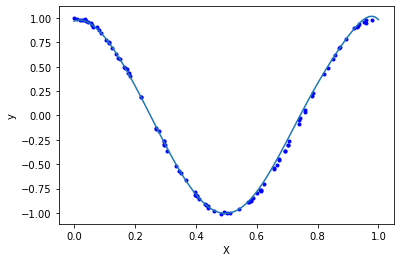

Plot classifier with 𝜆 = 1e-10 :


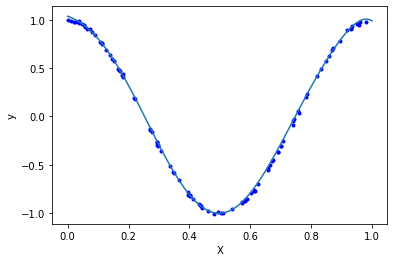

Plot classifier with 𝜆 = 1e-08 :


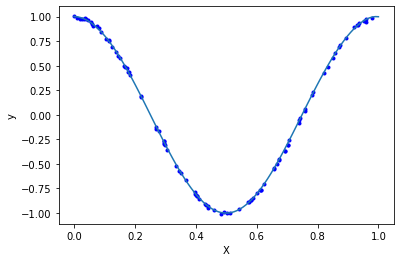

Plot classifier with 𝜆 = 1e-06 :


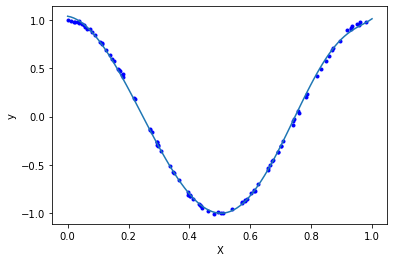

Plot classifier with 𝜆 = 0.0001 :


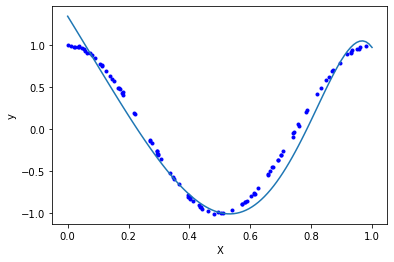

Plot classifier with 𝜆 = 0.01 :


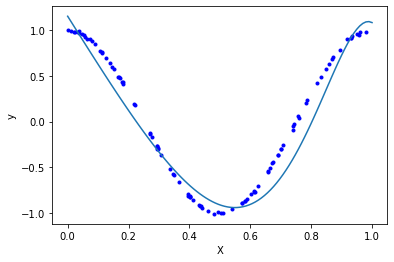

Plot classifier with 𝜆 = 1.0 :


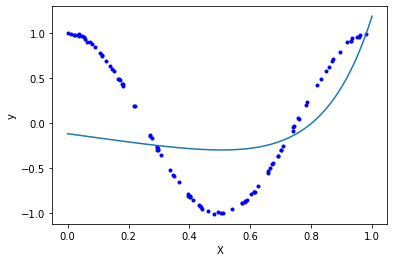

Plot classifier with 𝜆 = 100.0 :


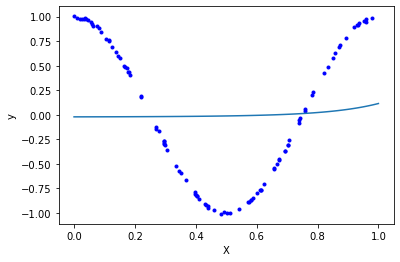

Plot classifier with 𝜆 = 10000.0 :


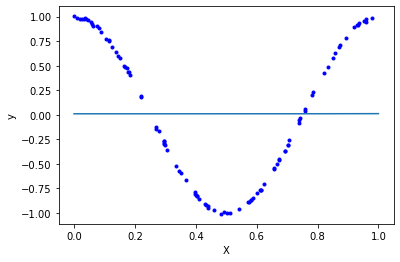

In [19]:
# generate polynomial features
poly = PolynomialFeatures(degree=10)
x_pf_test = poly.fit_transform(x_test)
    
# iterate lambda
mse_test = []
for i in range(len(lambda_list)):
    # get polynomial estimator and predict
    clf = ridge_estimators[i]
    y_test_predict = clf.predict(x_pf_test)

    # get the mean squared error for test set
    mse_test.append(mean_squared_error(y_test, y_test_predict))
    
    # plot the curve
    if i % 2 == 0:
        print("Plot classifier with 𝜆 = %s :" % (lambda_list[i]))
        plt.plot(x_test, y_test, "b.")
        plt.xlabel('X')
        plt.ylabel('y')
        xx = np.linspace(0, 1, 100)
        xx_transformed = poly.fit_transform(xx.reshape(xx.shape[0], 1), "r")
        yy = clf.predict(xx_transformed)
        plt.plot(xx, yy)
        plt.show()

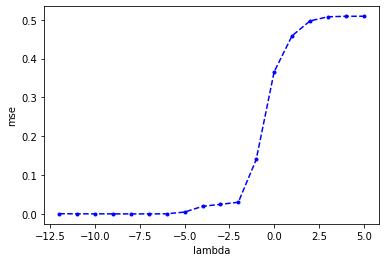

In [20]:
# plot the test error figure
plt.plot([math.log(x, 10) for x in lambda_list], mse_test, "--b.")
plt.xlabel('lambda')
plt.ylabel('mse')
plt.show()

In [21]:
mse_test_pair = np.vstack((lambda_list, mse_test)).T
mse_test_pair

array([[1.00000000e-12, 6.18684220e-04],
       [1.00000000e-11, 3.84267184e-04],
       [1.00000000e-10, 2.93134204e-04],
       [1.00000000e-09, 2.43881554e-04],
       [1.00000000e-08, 1.20829855e-04],
       [1.00000000e-07, 1.54584825e-04],
       [1.00000000e-06, 3.80963889e-04],
       [1.00000000e-05, 4.93544494e-03],
       [1.00000000e-04, 1.96592614e-02],
       [1.00000000e-03, 2.47610475e-02],
       [1.00000000e-02, 3.01778437e-02],
       [1.00000000e-01, 1.40327612e-01],
       [1.00000000e+00, 3.65847682e-01],
       [1.00000000e+01, 4.58490421e-01],
       [1.00000000e+02, 4.96713741e-01],
       [1.00000000e+03, 5.07496750e-01],
       [1.00000000e+04, 5.08760144e-01],
       [1.00000000e+05, 5.08888611e-01]])

### (iii) 

What value of λ has the minimal Test Error? What is the corresponding polynomial? (In (i), you should choose a range of values of λ such that you can see the minimizing λ (i.e., the Test Error initially roughly decreases as λ increases and then roughly increases after a certain point).)

**Answer:**

According to the test mse array, we can see that when 𝜆 = 1e-8, it has the minimal test mse = 1.20829855e-04.

### (iv) 
Repeat (i,ii,iii) when m = 20.

In [22]:
# generate polynomial features
poly = PolynomialFeatures(degree=10)
x_pf_train = poly.fit_transform(x_train_20)

# iterate lambda
mse_train = []
ridge_estimators = []
for i in range(len(lambda_list)):
    # fit and predict
    clf = Ridge(alpha=lambda_list[i])
    clf.fit(x_pf_train, y_train_20)
    ridge_estimators.append(clf)
    y_train_predict = clf.predict(x_pf_train)
    
    # get the mean squared error for training set
    mse_train.append(mean_squared_error(y_train_20, y_train_predict))

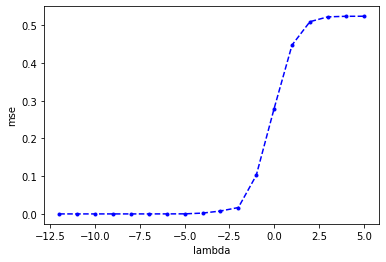

In [23]:
# plot the training error figure
plt.plot([math.log(x, 10) for x in lambda_list], mse_train, "--b.")
plt.xlabel('lambda')
plt.ylabel('mse')
plt.show()

In [24]:
# generate polynomial features
poly = PolynomialFeatures(degree=10)
x_pf_test = poly.fit_transform(x_test)
    
# iterate lambda
mse_test = []
for i in range(len(lambda_list)):
    # get polynomial estimator and predict
    clf = ridge_estimators[i]
    y_test_predict = clf.predict(x_pf_test)

    # get the mean squared error for test set
    mse_test.append(mean_squared_error(y_test, y_test_predict))

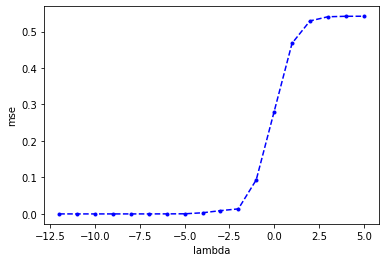

In [25]:
# plot the test error figure
plt.plot([math.log(x, 10) for x in lambda_list], mse_test, "--b.")
plt.xlabel('lambda')
plt.ylabel('mse')
plt.show()

In [26]:
mse_test_pair = np.vstack((lambda_list, mse_test)).T
mse_test_pair

array([[1.00000000e-12, 1.35764856e-04],
       [1.00000000e-11, 1.30676450e-04],
       [1.00000000e-10, 1.29709268e-04],
       [1.00000000e-09, 1.30158600e-04],
       [1.00000000e-08, 1.31600527e-04],
       [1.00000000e-07, 1.55482947e-04],
       [1.00000000e-06, 2.40172407e-04],
       [1.00000000e-05, 4.40995011e-04],
       [1.00000000e-04, 3.24545511e-03],
       [1.00000000e-03, 9.06523223e-03],
       [1.00000000e-02, 1.39182889e-02],
       [1.00000000e-01, 9.34121995e-02],
       [1.00000000e+00, 2.80530526e-01],
       [1.00000000e+01, 4.67654055e-01],
       [1.00000000e+02, 5.29006691e-01],
       [1.00000000e+03, 5.40454893e-01],
       [1.00000000e+04, 5.41743380e-01],
       [1.00000000e+05, 5.41873909e-01]])

According to the test mse array, we can see that when 𝜆 = 1e-10, it has the minimal test mse = 1.29709268e-04.

## Question 3

Question 3 is very similar to question 2. I'm also going to use the LASSO linear model in scikit-learn.

### (i) 

For a range of values of λ > 0 ranging from very small to large, determine the polynomials $p^λ_{10}(x)$ that minimize the regularized error for each λ. Plot the Training Error of each of these polynomials as a function of λ. For the x-axis, you may want to have log λ rather than λ.

Plot classifier with 𝜆 = 0.001 :


/Users/minrengwu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003643711245262332, tolerance: 0.0007315531716520336
  positive)


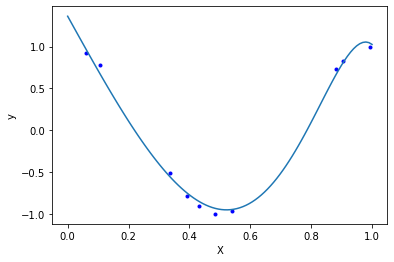

Plot classifier with 𝜆 = 0.01 :


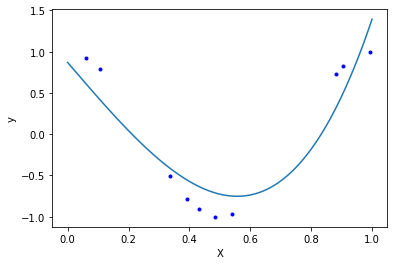

Plot classifier with 𝜆 = 0.1 :


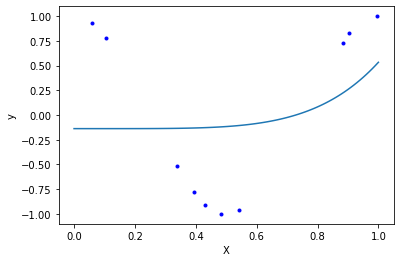

Plot classifier with 𝜆 = 1.0 :


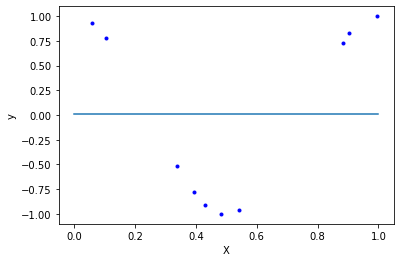

Plot classifier with 𝜆 = 10.0 :


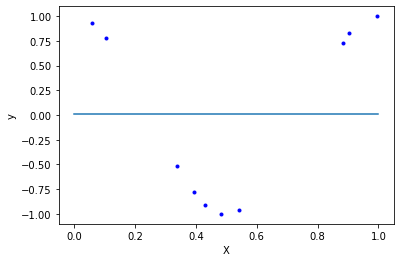

Plot classifier with 𝜆 = 100.0 :


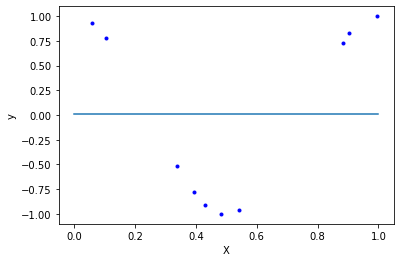

Plot classifier with 𝜆 = 1000.0 :


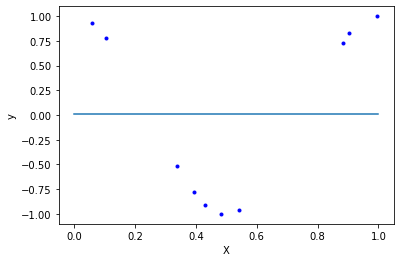

Plot classifier with 𝜆 = 10000.0 :


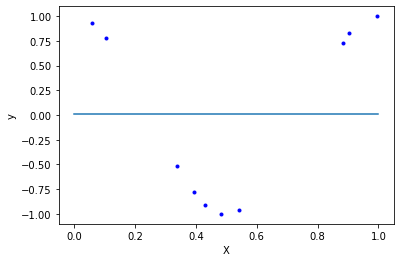

In [27]:
# generate polynomial features
poly = PolynomialFeatures(degree=10)
x_pf_train = poly.fit_transform(x_train_10)

# generate lambda from 0.01 to 1e6
lambda_list = []
for i in range(-3, 5):
    lambda_list.append(math.pow(10, i))

# iterate lambda
mse_train = []
lasso_estimators = []
for i in range(len(lambda_list)):
    # fit and predict
    clf = Lasso(alpha=lambda_list[i])
    clf.fit(x_pf_train, y_train_10)
    lasso_estimators.append(clf)
    y_train_predict = clf.predict(x_pf_train)
    
    # get the mean squared error for training set
    mse_train.append(mean_squared_error(y_train_10, y_train_predict))
    
    # plot the curve
    print("Plot classifier with 𝜆 = %s :" % (lambda_list[i]))
    plt.plot(x_train_10, y_train_10, "b.")
    plt.xlabel('X')
    plt.ylabel('y')
    xx = np.linspace(0, 1, 100)
    xx_transformed = poly.fit_transform(xx.reshape(xx.shape[0], 1), "r")
    yy = clf.predict(xx_transformed)
    plt.plot(xx, yy)
    plt.show()

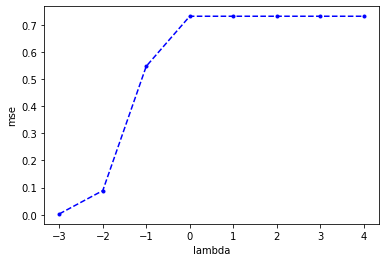

In [28]:
# plot the training error figure
plt.plot([math.log(x, 10) for x in lambda_list], mse_train, "--b.")
plt.xlabel('lambda')
plt.ylabel('mse')
plt.show()

In [29]:
mse_train

[0.003028825120733055,
 0.08892720828675187,
 0.5472110493556877,
 0.7315531716520336,
 0.7315531716520336,
 0.7315531716520336,
 0.7315531716520336,
 0.7315531716520336]

### (ii) 

Plot the Test Error of each of the polynomials obtained in (i) for a Test Set of t =100 samples.

Plot classifier with 𝜆 = 0.001 :


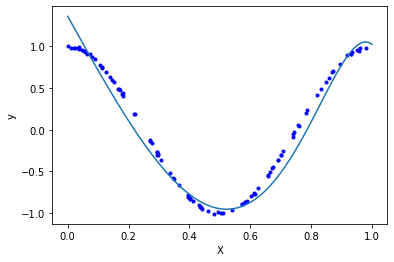

Plot classifier with 𝜆 = 0.1 :


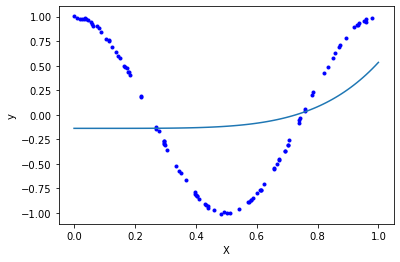

Plot classifier with 𝜆 = 10.0 :


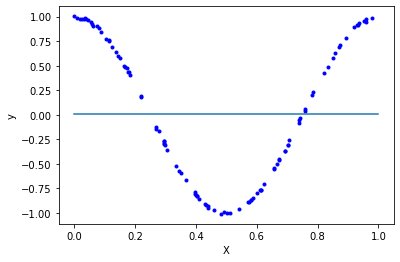

Plot classifier with 𝜆 = 1000.0 :


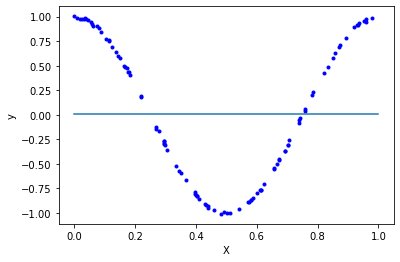

In [30]:
# generate polynomial features
poly = PolynomialFeatures(degree=10)
x_pf_test = poly.fit_transform(x_test)
    
# iterate lambda
mse_test = []
for i in range(len(lambda_list)):
    # get polynomial estimator and predict
    clf = lasso_estimators[i]
    y_test_predict = clf.predict(x_pf_test)

    # get the mean squared error for test set
    mse_test.append(mean_squared_error(y_test, y_test_predict))
    
    # plot the curve
    if i % 2 == 0:
        print("Plot classifier with 𝜆 = %s :" % (lambda_list[i]))
        plt.plot(x_test, y_test, "b.")
        plt.xlabel('X')
        plt.ylabel('y')
        xx = np.linspace(0, 1, 100)
        xx_transformed = poly.fit_transform(xx.reshape(xx.shape[0], 1), "r")
        yy = clf.predict(xx_transformed)
        plt.plot(xx, yy)
        plt.show()

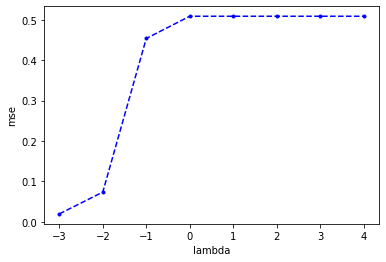

In [31]:
# plot the test error figure
plt.plot([math.log(x, 10) for x in lambda_list], mse_test, "--b.")
plt.xlabel('lambda')
plt.ylabel('mse')
plt.show()

In [32]:
mse_test_pair = np.vstack((lambda_list, mse_test)).T
mse_test_pair

array([[1.00000000e-03, 1.94498010e-02],
       [1.00000000e-02, 7.34258752e-02],
       [1.00000000e-01, 4.53869633e-01],
       [1.00000000e+00, 5.08902909e-01],
       [1.00000000e+01, 5.08902909e-01],
       [1.00000000e+02, 5.08902909e-01],
       [1.00000000e+03, 5.08902909e-01],
       [1.00000000e+04, 5.08902909e-01]])

### (iii) 

What value of λ has the minimal Test Error? What is the corresponding polynomial? (In (i), you should choose a range of values of λ such that you can see the minimizing λ (i.e., the Test Error initially roughly decreases as λ increases and then roughly increases after a certain point).)

**Answer:**

According to the test mse array, we can see that when 𝜆 = 1e-3, it has the minimal test mse = 1.94498010e-02.

### (iv) 
Repeat (i,ii,iii) when m = 20.

In [33]:
# generate polynomial features
poly = PolynomialFeatures(degree=10)
x_pf_train = poly.fit_transform(x_train_20)

# iterate lambda
mse_train = []
lasso_estimators = []
for i in range(len(lambda_list)):
    # fit and predict
    clf = Lasso(alpha=lambda_list[i])
    clf.fit(x_pf_train, y_train_20)
    lasso_estimators.append(clf)
    y_train_predict = clf.predict(x_pf_train)
    
    # get the mean squared error for training set
    mse_train.append(mean_squared_error(y_train_20, y_train_predict))

/Users/minrengwu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.023802633304368492, tolerance: 0.0010472464829590464
  positive)


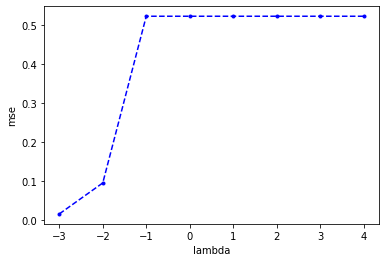

In [34]:
# plot the training error figure
plt.plot([math.log(x, 10) for x in lambda_list], mse_train, "--b.")
plt.xlabel('lambda')
plt.ylabel('mse')
plt.show()

In [35]:
# generate polynomial features
poly = PolynomialFeatures(degree=10)
x_pf_test = poly.fit_transform(x_test)
    
# iterate lambda
mse_test = []
for i in range(len(lambda_list)):
    # get polynomial estimator and predict
    clf = lasso_estimators[i]
    y_test_predict = clf.predict(x_pf_test)

    # get the mean squared error for test set
    mse_test.append(mean_squared_error(y_test, y_test_predict))

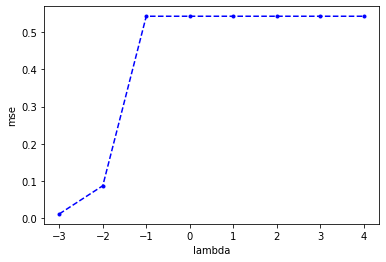

In [36]:
# plot the test error figure
plt.plot([math.log(x, 10) for x in lambda_list], mse_test, "--b.")
plt.xlabel('lambda')
plt.ylabel('mse')
plt.show()

In [37]:
mse_test_pair = np.vstack((lambda_list, mse_test)).T
mse_test_pair

array([[1.00000000e-03, 1.21429284e-02],
       [1.00000000e-02, 8.76101784e-02],
       [1.00000000e-01, 5.41888432e-01],
       [1.00000000e+00, 5.41888432e-01],
       [1.00000000e+01, 5.41888432e-01],
       [1.00000000e+02, 5.41888432e-01],
       [1.00000000e+03, 5.41888432e-01],
       [1.00000000e+04, 5.41888432e-01]])

According to the test mse array, we can see that when 𝜆 = 1e-3, it has the minimal test mse = 1.21429284e-02.